In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = True
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[:,0] = X_tst[:,0] * 12.0 + 4.0
X_tst[:,1] = X_tst[:,1] * 3.0 + 4.0
print(X_tst.shape)

cfg = additive_1x2_uniform_416_47_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_416_47_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-200000


2019-05-22 17:05:08,641:INFO:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-200000
2019-05-22 17:05:09,308:INFO:TEST ALL-200000: t = 0.6465, Net_Loss: -9.764903, Revenue: 9.764903


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

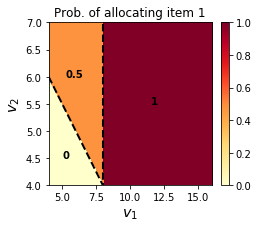

In [6]:
points = [(4, 6), (8, 4), (8, 7)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

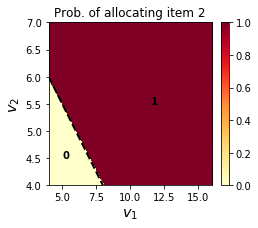

In [7]:
points = [(4, 6), (8, 4)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)